In [57]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from utils import tweet_level_feature_generation

In [58]:
data = pd.read_json('Twibot-20/train.json')
print('Nulls: ', data.isnull().sum().sum())
print('Shape of the data: ', data.shape)
data.sample(5)

Nulls:  809
Shape of the data:  (8278, 6)


,ID,profile,tweet,neighbor,domain,label
4103,575565118,"{'id': '575565118 ', 'id_str': '575565118 ', '...",[RT @FCBayernES: 🎶🎶🎶 “¡Ganáis el campeonato de...,None,"[Business, Entertainment, Sports]",0
6023,2202811584,"{'id': '2202811584 ', 'id_str': '2202811584 ',...",[RT @SimonHamilton: Pleased to see the @Tribec...,"{'following': ['92563487', '1506033949', '2841...",[Entertainment],1
8273,1630890068,"{'id': '1630890068 ', 'id_str': '1630890068 ',...",[@sethgoldberg17 @jaysonst Fan interference? I...,"{'following': ['237453978', '462581299', '1706...",[Sports],0
6412,1299794038615347200,"{'id': '1299794038615347206 ', 'id_str': '1299...",[RT @RNewmanValencia: ⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️⬇️ https...,"{'following': ['25589776', '26257166', '125877...",[Sports],0
4571,577749405,"{'id': '577749405 ', 'id_str': '577749405 ', '...",[RT @teri_bighouse: If you don't follow @prusc...,"{'following': ['26115505', '547937681', '77103...",[Entertainment],1


In [59]:
data[data['tweet'].isnull()]['label'].value_counts()

0    40
1    15
Name: label, dtype: int64

In [60]:
data = data.dropna()

In [61]:
data['label'].value_counts()

1    4513
0    2958
Name: label, dtype: int64

In [62]:
new_features = tweet_level_feature_generation(data, normalize=True)
data = new_features.merge(data, how='inner', on='ID')
print('Data Shape: ', data.shape)
data.sample(5)

Data Shape:  (7471, 10)


,ID,num_mentions,num_links,retweet,num_tweets,profile,tweet,neighbor,domain,label
133,14534412,1.025381,0.258883,0.370558,197,"{'id': '14534412 ', 'id_str': '14534412 ', 'na...","[@Argorak Ancient Rust?\n, @mkawia some days y...","{'following': ['795244', '3303687458', '275686...",[Politics],1
3774,1180935702,1.924623,0.728643,0.160804,199,"{'id': '1180935702 ', 'id_str': '1180935702 ',...","[La epidemia no ha terminado, gracias al esfue...","{'following': ['88990799', '174361486', '29469...",[Business],0
4792,3158333460,1.402010,0.135678,0.914573,199,"{'id': '3158333460 ', 'id_str': '3158333460 ',...",[RT @foogatwo: #NJ #COVID19 Date of Death upda...,"{'following': ['1177327319477837824', '1064206...",[Sports],1
4080,1912314038,0.875000,1.041667,0.166667,24,"{'id': '1912314038 ', 'id_str': '1912314038 ',...",[Back Fnatic Gear on Indiegogo... https://t.co...,"{'following': ['2325984198', '35838883', '5870...",[Entertainment],1
5006,4152777748,1.326203,0.540107,0.524064,187,"{'id': '4152777748 ', 'id_str': '4152777748 ',...",[Pleased to announce we are back but on a new ...,"{'following': ['2540993785', '190555024', '629...",[Sports],1


<AxesSubplot:xlabel='num_tweets', ylabel='Count'>

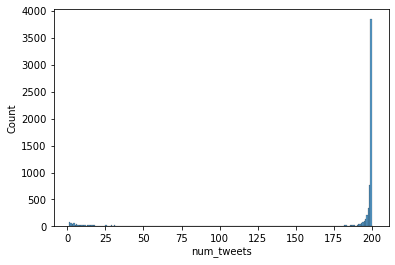

In [63]:
sns.histplot(data=data['num_tweets'])

(190.0, 200.0)

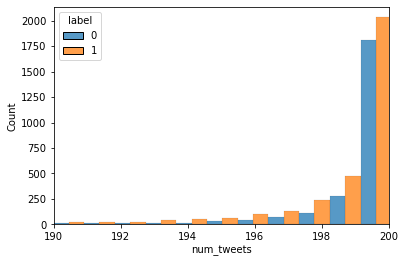

In [64]:
ax = sns.histplot(data[['num_tweets', 'label']], x='num_tweets', hue='label', multiple='dodge')
ax.set_xlim(190, 200)

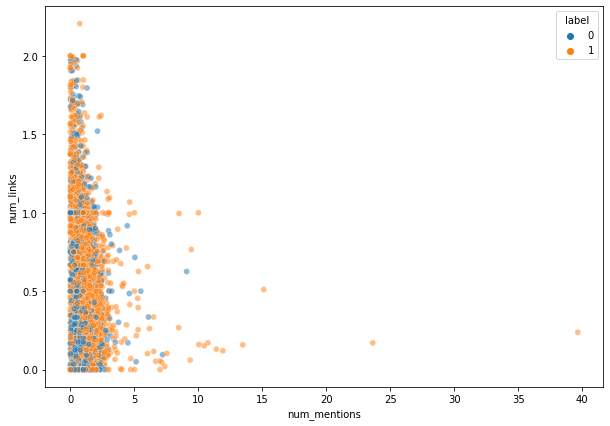

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
ax = sns.scatterplot(data=data[['num_links', 'num_mentions', 'label']], y='num_links', x='num_mentions', hue='label', alpha=.5, ax=ax)

<AxesSubplot:xlabel='retweet', ylabel='Count'>

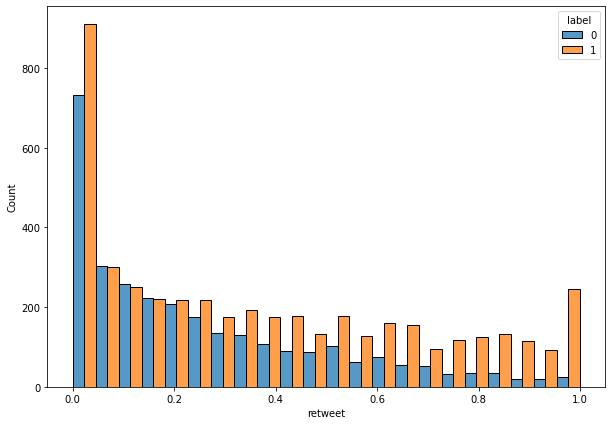

In [71]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.histplot(data=data[['retweet', 'label']], x='retweet', hue='label', multiple='dodge', ax=ax)